In [1]:
import json
import requests
import flickrapi
import pandas as pd
from tqdm import tqdm
from vincenty import vincenty
import geopandas
import matplotlib.pyplot as plt
import contextily as ctx
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import time
import numpy as np
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten
from itertools import combinations

In [2]:
df = pd.read_csv('dataset/dataset.csv')
df.head()

,id,name,lat,lon,locality,region,neighbourhood
0,50988380961,Late winter 2020-21,60.449969,22.265006,Turku,Finland Proper,Turku
1,50988488177,Late winter 2020-21,60.449969,22.265006,Turku,Finland Proper,Turku
2,50988380816,Late winter 2020-21,60.449969,22.265006,Turku,Finland Proper,Turku
3,50988380741,Late winter 2020-21,60.449969,22.265006,Turku,Finland Proper,Turku
4,50988487997,Late winter 2020-21,60.449969,22.265006,Turku,Finland Proper,Turku


In [3]:
df = df.groupby(['lon','lat']).size().reset_index().rename(columns={0:'count'})

In [6]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.lon, df.lat))

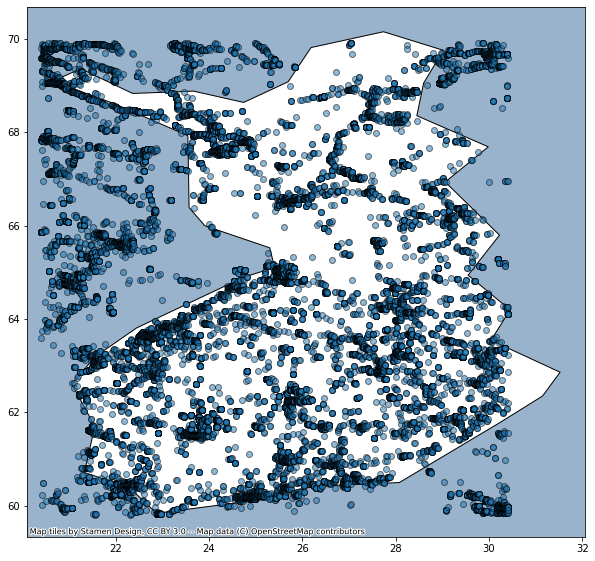

In [7]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.name == 'Finland'].plot(figsize=(10, 10),
    color='white', edgecolor='black')
ctx.add_basemap(ax, zoom=2)
gdf.plot(ax=ax, alpha=0.5, edgecolor='k')

plt.show()

In [4]:
coords = df[["lat", "lon"]].values

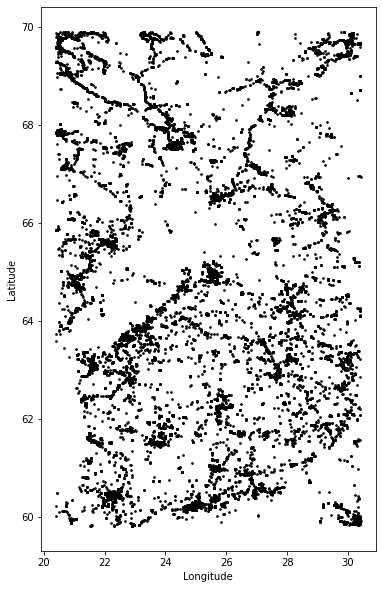

In [9]:
fig, ax = plt.subplots(figsize=[6, 10])
df_scatter = ax.scatter(df['lon'], df['lat'], c='k', alpha=0.9, s=3)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [32]:
img = plt.imread('map.png')
bbox = (20.410, 30.410, 59.800, 69.910)

C:\Users\blazhko\Anaconda3\envs\cn\lib\site-packages\scipy\cluster\vq.py:575: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


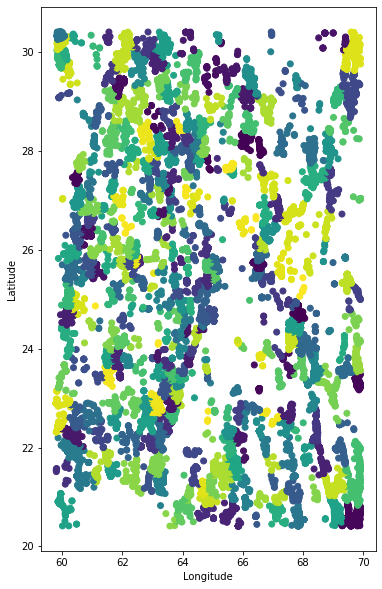

In [5]:
nodes, colors = kmeans2(coords, 500, iter = 20)  

fig, ax = plt.subplots(figsize=[6, 10])
df_scatter = ax.scatter(coords[:,0], coords[:,1], c=colors);
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


In [79]:
x[0:20]

[array([60.20076033, 25.40509362]),
 array([68.20656207, 24.06675035]),
 array([62.89760322, 28.44399447]),
 array([60.97681689, 25.64733364]),
 array([67.62599646, 21.76287317]),
 array([60.60687385, 27.73980812]),
 array([65.98590788, 21.32265624]),
 array([68.14547197, 23.2895711 ]),
 array([69.84401038, 21.5641036 ]),
 array([65.91203934, 24.48218114]),
 array([68.08388083, 19.62079596]),
 array([65.35768719, 24.25506204]),
 array([61.50298581, 21.80619008]),
 array([66.54606458, 23.1855885 ]),
 array([66.03559543, 19.94841977]),
 array([66.46686062, 21.78979405]),
 array([58.94338532, 28.94251975]),
 array([60.27383829, 29.22554993]),
 array([63.9427262, 24.2647329]),
 array([58.65300659, 23.35498858])]

In [69]:
len(y)

46404

In [12]:
nodes_df = pd.DataFrame(nodes, columns=['lat', 'lon'])
nodes_df['id'] = nodes_df.index
nodes_df.to_csv('dataset/cluster_centers.csv', index=False)
nodes_df.head()

,lat,lon,id
0,66.569203,28.075112,0
1,67.806824,24.798926,1
2,66.062924,28.188141,2
3,64.843576,27.803277,3
4,57.239087,32.776318,4


In [11]:
distances = pd.DataFrame(columns=['source', 'destination', 'v_distance'])


In [9]:
distances = pd.DataFrame(columns=['source', 'destination', 'v_distance'])

for combo in tqdm(combinations(nodes_df[["id", "lat", "lon"]].values, 2)):
    node0 = combo[0]
    node1 = combo[1]
    s = (float(node0[1]), float(node0[2]))
    d = (float(node1[1]), float(node1[2]))
    v = vincenty(s, d)
    new_row = {'source': node0[0], 'destination': node1[0], 'v_distance': v}
    distances = distances.append(new_row, ignore_index=True)
    
    
    

124750it [04:49, 430.41it/s]


In [10]:
distances.head()

,source,destination,v_distance
0,0.0,1.0,197.838625
1,0.0,2.0,56.683180
2,0.0,3.0,192.816840
3,0.0,4.0,1067.990449
4,0.0,5.0,235.588556


In [11]:
distances.to_csv('dataset/distances.csv', index=False)